In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("Position_Salaries.csv")

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


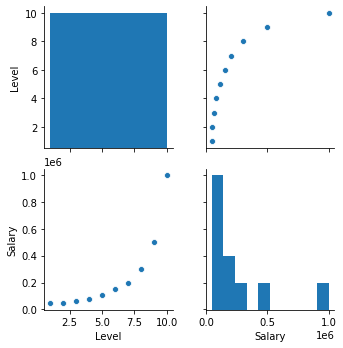

In [4]:
sns.pairplot(df)

In [5]:
df = df.drop(['Position'],axis = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Level   10 non-null     int64
 1   Salary  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [7]:
X = df.drop(['Salary'],axis =1)

In [8]:
y = df['Salary']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [11]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8, 1), (2, 1), (8,), (2,))

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
print("Training Accuracy: ",lr.score(X_train,y_train))
print("Testing Accuracy: ",lr.score(X_test,y_test))

Training Accuracy:  0.6366049276570868
Testing Accuracy:  0.8451346684575974


## Polynomial Regression

In [41]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X_train)

lr2 = LinearRegression()
lr2.fit(X_poly,y_train)

LinearRegression()

In [42]:
X_poly

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [43]:
X_poly_test = pr.transform(X_test)

In [44]:
print("Training Accuracy: ",lr2.score(X_poly,y_train))
print("Testing Accuracy: ",lr2.score(X_poly_test,y_test))

Training Accuracy:  0.9995857211026754
Testing Accuracy:  0.9714666803843252


### When we apply Linear Regression the data train accuracy is low  and when we apply Polynomial Regression accuracy is high

#### Graph when we Use Linear Regression

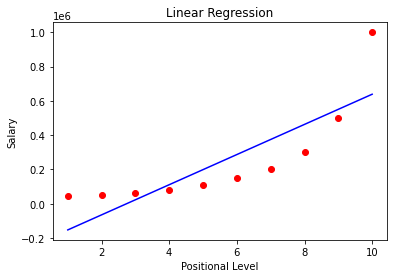

In [60]:
plt.scatter(X,y,color ='red')
plt.plot(X,lr.predict(X),color ='blue')
plt.title("Linear Regression")
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.show()

In [47]:
X_poly,y_train,X_poly_test,y_test

(array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
        [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
        [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
        [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
        [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
        [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
        [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
        [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]]),
 5     150000
 0      45000
 7     300000
 2      60000
 9    1000000
 4     110000
 3      80000
 6     200000
 Name: Salary, dtype: int64,
 array([[1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
        [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]]),
 8    500000
 1     50000
 Name: Salary, dtype: int64)

In [54]:
y_train

5     150000
0      45000
7     300000
2      60000
9    1000000
4     110000
3      80000
6     200000
Name: Salary, dtype: int64

In [53]:
X_train

,Level
5,6
0,1
7,8
2,3
9,10
4,5
3,4
6,7


#### Graph when we Use Polynomial Regression

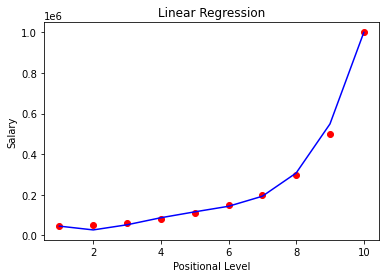

In [55]:
plt.scatter(X,y,color ='red')
plt.plot(X, lr2.predict(pr.fit_transform(X)), color = 'blue')
plt.title("Linear Regression")
plt.xlabel('Positional Level')
plt.ylabel('Salary')
plt.show()